In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load and prepare the data
data = pd.read_excel('Earthquake Damage Data.xlsx')
X = data[['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'BC1', 'BC2', 'BC3', 'BC4', 'BC5', 'BC6', 'BC7', 'BC8']]
y = data['DS']

In [16]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Create and train the logistic regression model
model = LogisticRegression(multi_class='multinomial', max_iter=1000)
model.fit(X_train, y_train)

C:\Users\ChuiChkk\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [18]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report
class_report = classification_report(y_test, y_pred)

C:\Users\ChuiChkk\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ChuiChkk\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ChuiChkk\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

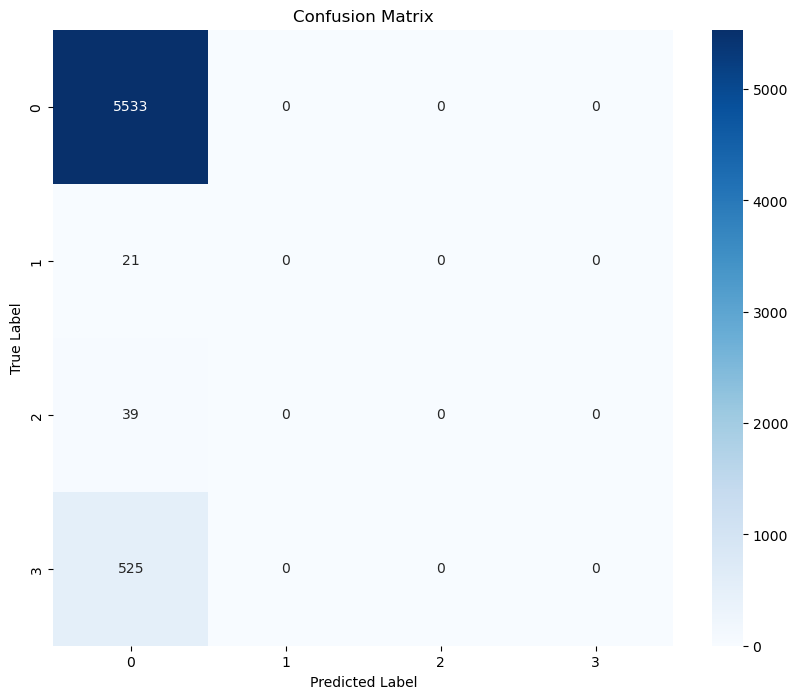

In [24]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [25]:
# Print results
print("\nModel Performance:")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(class_report)


Model Performance:
Accuracy: 0.9044

Classification Report:
              precision    recall  f1-score   support

           1       0.90      1.00      0.95      5533
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        39
           4       0.00      0.00      0.00       525

    accuracy                           0.90      6118
   macro avg       0.23      0.25      0.24      6118
weighted avg       0.82      0.90      0.86      6118



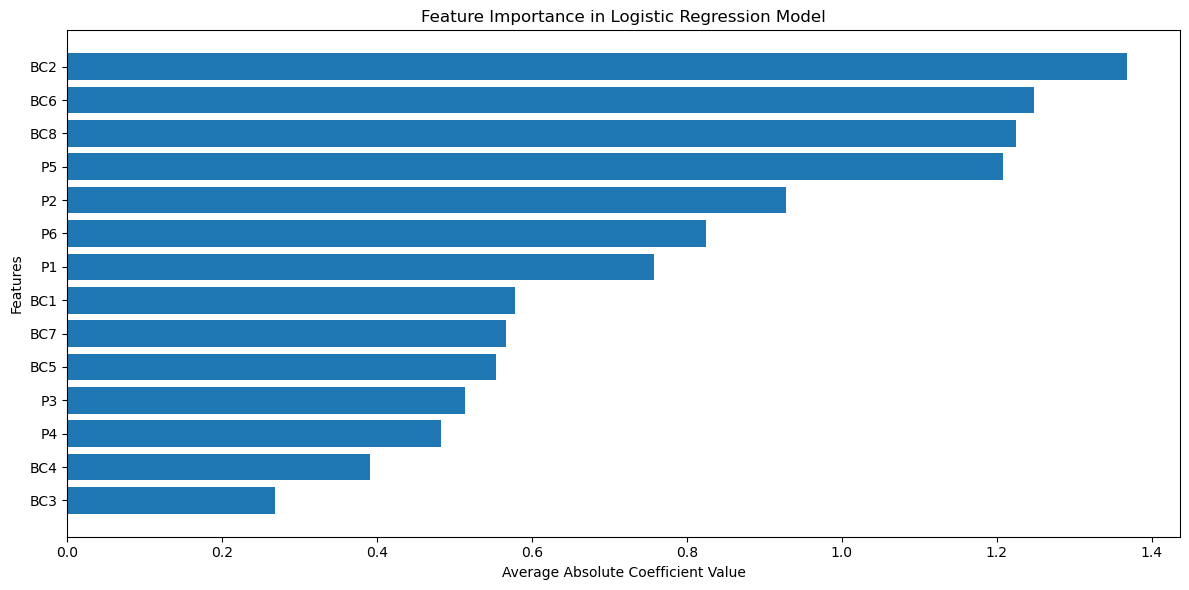


Feature Importance:
BC3: 0.2677
BC4: 0.3905
P4: 0.4822
P3: 0.5136
BC5: 0.5529
BC7: 0.5670
BC1: 0.5784
P1: 0.7573
P6: 0.8249
P2: 0.9276
P5: 1.2084
BC8: 1.2247
BC6: 1.2480
BC2: 1.3681


In [26]:
# Calculate and plot feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.mean(np.abs(model.coef_), axis=0)
})
feature_importance = feature_importance.sort_values('Importance', ascending=True)

plt.figure(figsize=(12, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Feature Importance in Logistic Regression Model')
plt.xlabel('Average Absolute Coefficient Value')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

print("\nFeature Importance:")
for idx, row in feature_importance.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")